In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the uploaded folder
folder_path1 = '/content/drive/My Drive/PROJE/140'

# List files in the folder
uploaded = os.listdir(folder_path1)

# Do whatever you want with the files
print(uploaded)

In [ ]:
import os

# Get the directory path where the files are uploaded
uploaded_directory = '/content/drive/My Drive/PROJE/140'  # Assuming the files are uploaded to the default directory in Colab

# List files in the directory
ses_dosyalari = os.listdir(uploaded_directory)

# Filter only .wav files
ses_dosyalari = [dosya for dosya in ses_dosyalari if dosya.endswith(".wav")]

In [ ]:
import shutil
import os

# Path to the uploaded folder
folder_path = '/content/drive/My Drive/PROJE/ArnavutSes'

# List files in the folder
etiketlenmis_dizin = os.listdir(folder_path)

# Do whatever you want with the files
print(etiketlenmis_dizin)

In [ ]:
import os
import shutil

# Define the directory paths
source_directory = '/content/drive/My Drive/PROJE/140'  # Replace with the actual directory path
destination_directory = '/content/labeled_files/'  # Replace with your desired path

# Create the labeled directory if it does not exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Create subdirectories for each emotion
emotions = ['angry', 'surprised', 'happy', 'sad']
for emotion in emotions:
    emotion_directory = os.path.join(destination_directory, emotion)
    if not os.path.exists(emotion_directory):
        os.makedirs(emotion_directory)

# Function to clean and label the files
def clean_and_label_files(source_directory, destination_directory):
    for file in os.listdir(source_directory):
        if file.endswith('.wav'):
            # Extract the emotion code from the file name
            emotion_code = ''.join([i for i in file if not i.isdigit()]).replace('.wav', '')

            if emotion_code in ['mutlu', 'uzgun', 'sinirli', 'saskin']:
                label = {
                    'mutlu': 'happy',
                    'uzgun': 'sad',
                    'sinirli': 'angry',
                    'saskin': 'surprised'
                }[emotion_code]

                labeled_directory_path = os.path.join(destination_directory, label)
                os.makedirs(labeled_directory_path, exist_ok=True)

                source_path = os.path.join(source_directory, file)
                destination_path = os.path.join(labeled_directory_path, file)
                shutil.copyfile(source_path, destination_path)

                print(f"Labeled file '{file}' as '{label}'. Moved to '{labeled_directory_path}'")
            else:
                print(f"Invalid emotion code '{emotion_code}' for file: {file}. Skipping...")
        else:
            print(f"File '{file}' is not a .wav file. Skipping...")

# Call the function to clean and label the files
clean_and_label_files(source_directory, destination_directory)


In [ ]:
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ses, ornekleme_hizi = librosa.load(audio_file, sr=None)
    mel_spektrogram = librosa.feature.melspectrogram(y=ses, sr=ornekleme_hizi)

    mel_spektrogram = librosa.power_to_db(mel_spektrogram, ref=np.max)

    librosa.display.specshow(mel_spektrogram, sr=ornekleme_hizi, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)



In [ ]:
create_pngs_from_wavs('labeled_files/angry', 'Spectrograms/angry')

In [ ]:
create_pngs_from_wavs('labeled_files/happy', 'Spectrograms/happy')

In [ ]:
create_pngs_from_wavs('labeled_files/sad', 'Spectrograms/sad')

In [ ]:
create_pngs_from_wavs('labeled_files/surprised', 'Spectrograms/surprised')

In [ ]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(32, 32), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

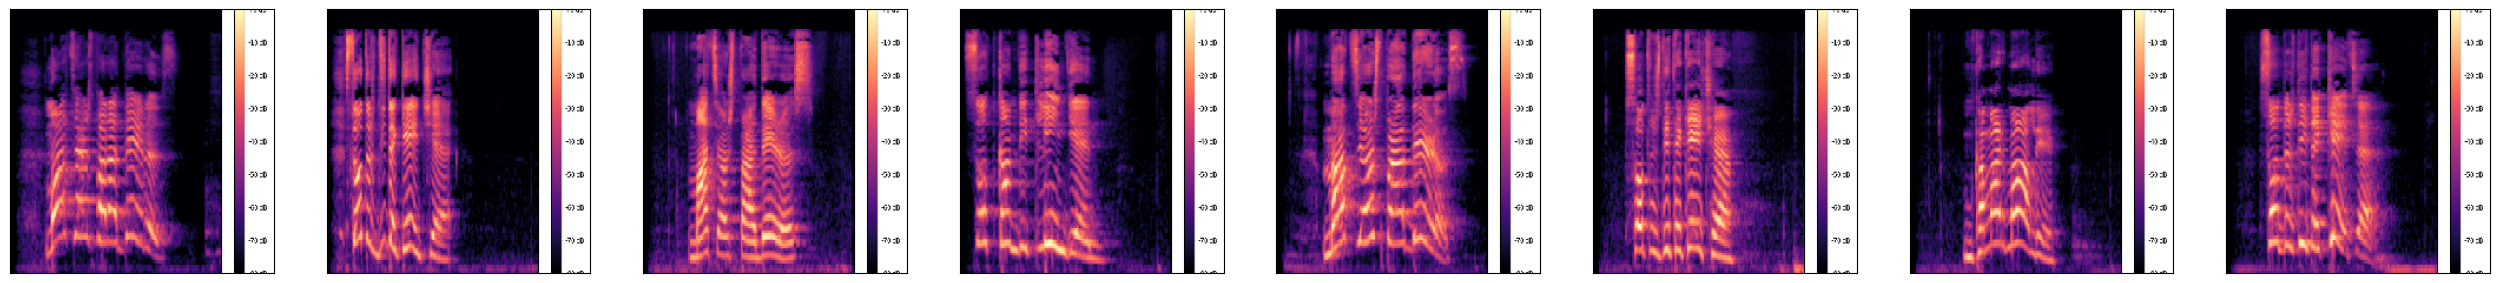

In [ ]:
images, labels = load_images_from_path('Spectrograms/angry', "angry")
show_images(images)

x += images
y += labels

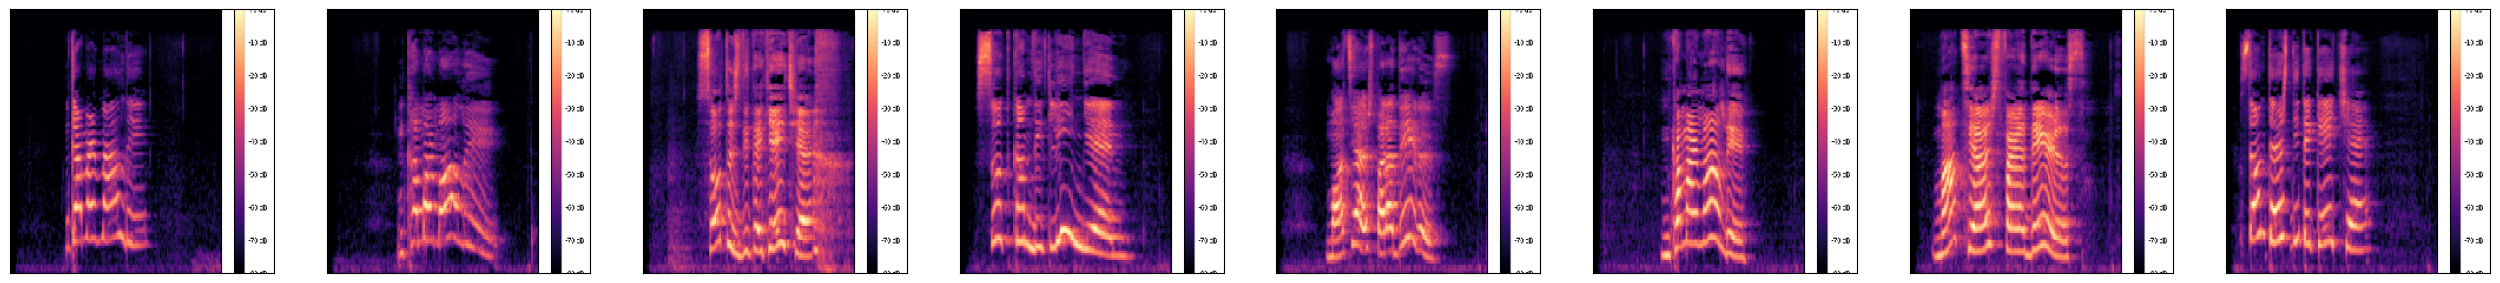

In [ ]:
images, labels = load_images_from_path('Spectrograms/happy', "happy")
show_images(images)

x += images
y += labels

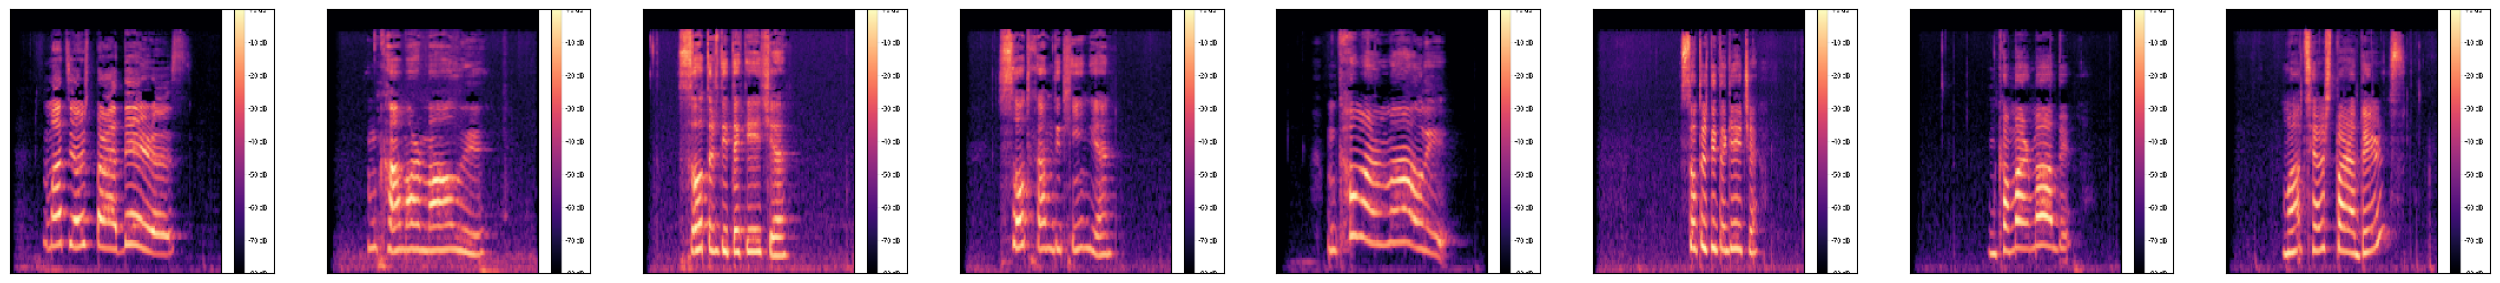

In [ ]:
images, labels = load_images_from_path('Spectrograms/sad', "sad")
show_images(images)

x += images
y += labels

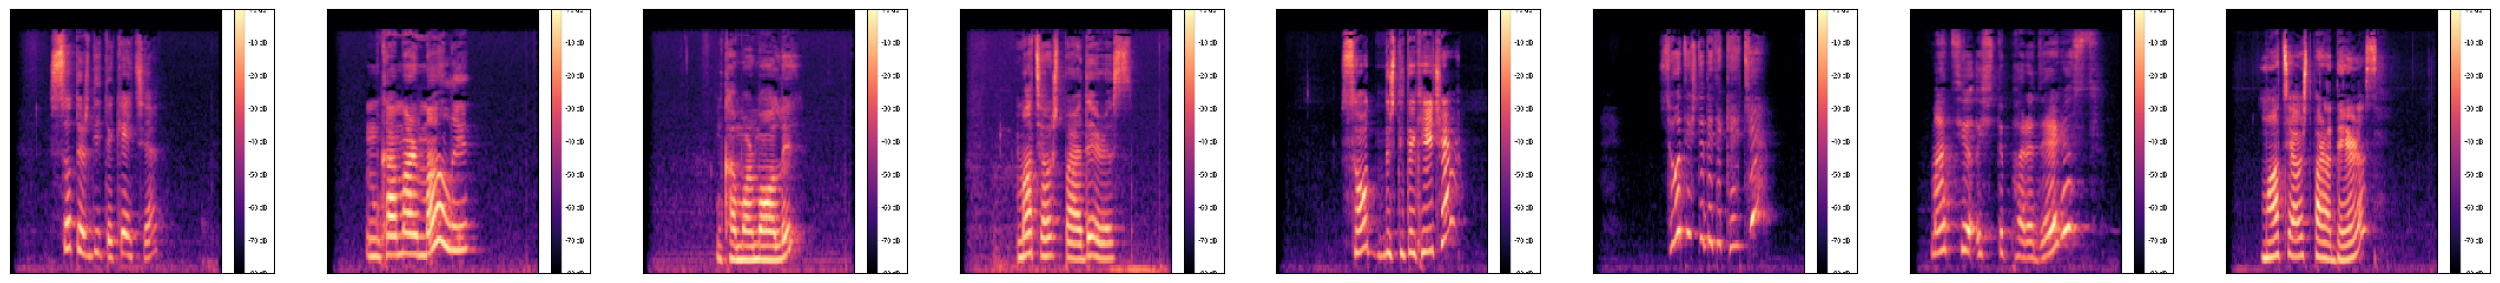

In [ ]:
images, labels = load_images_from_path('Spectrograms/surprised', "surprised")
show_images(images)

x += images
y += labels


In [ ]:
from skimage.transform import resize

hedef_boyut = (224, 224)
yeniden_boyutlandirilmis_spektrogramlar = []
for mel_spektrogram in x:
    mel_spektrogram_boyut = mel_spektrogram.shape
    if mel_spektrogram_boyut != hedef_boyut:
        # Mel-spektrogramu hedef boyuta yeniden boyutlandır
        yeniden_boyutlandirilmis = resize(mel_spektrogram, hedef_boyut, anti_aliasing=True)
    else:
        yeniden_boyutlandirilmis = mel_spektrogram
    yeniden_boyutlandirilmis_spektrogramlar.append(yeniden_boyutlandirilmis)

X = np.array(yeniden_boyutlandirilmis_spektrogramlar)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_numerical)

In [ ]:
X_train, X_test, Y_train_one_hot, Y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.1, random_state=42)

In [ ]:
print(len(X_train), len(Y_train_one_hot))

125 125


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

# ResNet50 modelini yükleme ve yapılandırma
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Modeli derleme
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, Y_train_one_hot, epochs=40, batch_size=16, validation_data=(X_test, Y_test_one_hot))

# Eğitim sonucu
train_loss, train_accuracy = model.evaluate(X_train, Y_train_one_hot)
test_loss, test_accuracy = model.evaluate(X_test, Y_test_one_hot)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


In [ ]:
# Eğitim ve doğrulama doğruluğunu çizdirme
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_fscore_support
import seaborn as sns
import numpy as np

# Eğitim ve doğrulama doğruluğunu çizdirme
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# plot_history(history) fonksiyonunu çağırmayı unutma.

# Tahminlerimizi alalım
Y_pred_one_hot = model.predict(X_test)
Y_pred = np.argmax(Y_pred_one_hot, axis=1)
Y_test = np.argmax(Y_test_one_hot, axis=1)

# Confusion Matrix'i çizdirelim
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall ve F1 Score'u hesaplayalım
report = classification_report(Y_test, Y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# ROC eğrisi ve AUC'yi çizdirelim
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot[:, i], Y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Her sınıf için ROC eğrisi
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision, Recall ve F1 Score'u çizdirme
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
